Epoch 1/20


C:\Users\nandh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: -256.3155 - val_accuracy: 0.0000e+00 - val_loss: -1565.8246
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -2508.7329 - val_accuracy: 0.0000e+00 - val_loss: -7297.5562
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -9886.1123 - val_accuracy: 0.0000e+00 - val_loss: -22536.7168
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -29029.3613 - val_accuracy: 0.0000e+00 - val_loss: -53827.9492
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -65919.6562 - val_accuracy: 0.0000e+00 - val_loss: -107804.9922
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -134791.7812 - val_accuracy: 0.0000e+00 - val_loss: -193518.9688
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -224541.0000 - val_accuracy: 0.0000e+00 - val_loss: -314854.5625
Epoc

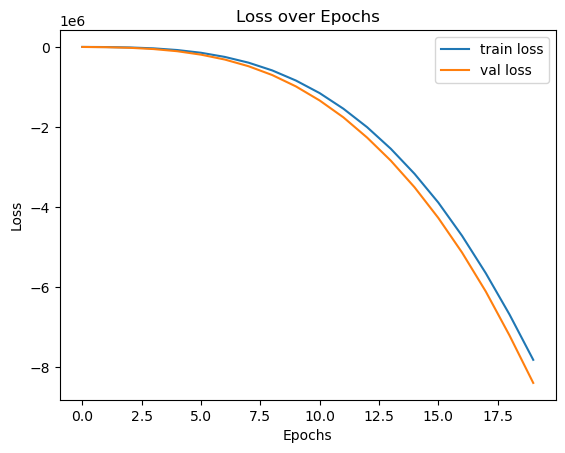

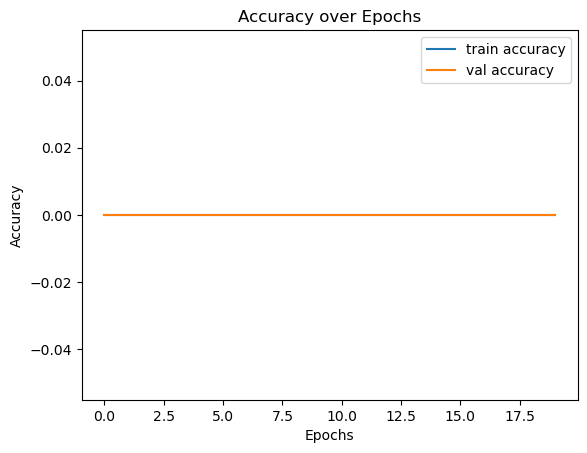

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C8D8DACCC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


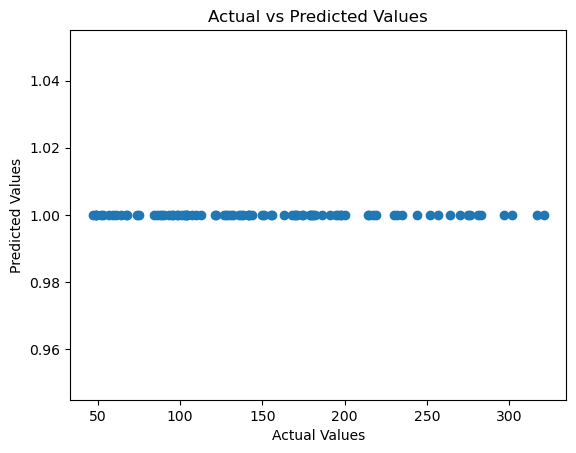

     target Diabetes Status
0     151.0        Diabetic
1      75.0    Non-Diabetic
2     141.0        Diabetic
3     206.0        Diabetic
4     135.0    Non-Diabetic
..      ...             ...
437   178.0        Diabetic
438   104.0    Non-Diabetic
439   132.0    Non-Diabetic
440   220.0        Diabetic
441    57.0    Non-Diabetic

[442 rows x 2 columns]


In [10]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt

diabetes_data = load_diabetes()

df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

df['target'] = diabetes_data.target

threshold = np.median(df['target'])

# binary classification
df['Diabetes Status'] = ['Diabetic' if target > threshold else 'Non-Diabetic' for target in df['target']]

# Features and labels
X = df.iloc[:, :-2].values  
y = df.iloc[:, -2].values   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN model
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

diabetes_report = df[['target', 'Diabetes Status']]

print(diabetes_report)

diabetes_report.to_csv('diabetes_status_report.csv', index=False)
